# Sounding Rocket I

Si tomamos a la aceleración de la gravedad como constante y planteamos energía tenemos:

$E_i = E_f$

Donde pondrémos la referencia de potencial 0 a la altura de despegue:

$E_i = \frac{1}{2}mv_0^2$

$E_f = mgh$

Por lo tanto, la distancia recorrida (altura) será:

$ \frac{1}{2}mv_0^2 = mgh$

$h = \frac{v_0^2}{2g}$

In [46]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

In [43]:
g = 9.81

In [35]:
h, v_0, g = sympy.symbols('v_0 g h', positive= True, real=True)

In [50]:
v_0_values = np.linspace(0,1000,500) # 0 a 2000 dividido en 500 slots

In [51]:
h_values = ((v_0_values**2)/2*g)/1000

plt.figure(figsize=(8,8))
plt.plot(v_0_values, h_values, color='blue')
plt.title('h(v_0) km')
plt.xlabel('Velocidad inicial m/s')
plt.ylabel('Altura alcanzada [km]')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sounding Rocket II

Si tomamos a la aceleración de la gravedad como variable y planteamos energía tenemos:

$E_i = E_f$

$E_i = -\frac{GM}{R_t} + \frac{1}{2}mv_0^2$

$E_f = -\frac{GM}{R_t + h}$

Por lo tanto, la distancia recorrida (altura) será:

$  -\frac{GM}{R_t} + \frac{1}{2}mv_0^2 =  -\frac{GM}{R_t + h}$

$  \frac{1}{2}mv_0^2 =  GM(\frac{1}{R_t} -\frac{1}{R_t + h})$


In [71]:
# Constantes
G = 6.67430e-11       # constante gravitacional (m^3 kg^-1 s^-2)
M = 5.972e24          # masa de la Tierra (kg)
R_earth = 6.371e6     # radio de la Tierra (m)
g = 9.81              # gravedad en la superficie (m/s^2)

In [62]:
from scipy.optimize import root_scalar

In [65]:
v0, h, G, M, r0 = sympy.symbols('v0 h G M r0', real=True, positive=True)

lhs = (1/2) * v0**2
rhs = G*M*(1/r0 - 1/(r0 + h))
eq = sympy.Eq(lhs, rhs)

# Intentar resolver explícitamente para h
sol = sympy.solve(eq, h)

In [67]:
sol

[r0**2*v0**2/(2.0*G*M - r0*v0**2)]

$h = \frac{R_t^2 v_0^2}{2GM - R_t v_0^2}$

Velocidad de escape: 11185.98 m/s


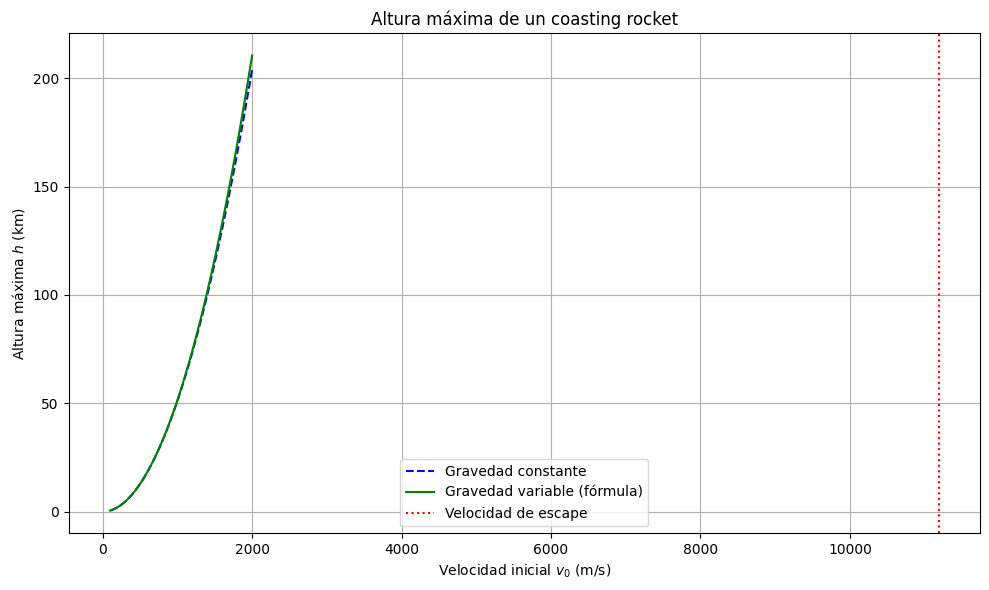

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
G = 6.67430e-11       # m^3 kg^-1 s^-2
M = 5.972e24          # kg
R_earth = 6.371e6     # m
g = 9.81              # m/s^2

# Velocidad de escape para referencia
v_escape = np.sqrt(2 * G * M / R_earth)
print(f"Velocidad de escape: {v_escape:.2f} m/s")

# Rango de velocidades hasta un poco menos que velocidad de escape (ej: 99%)
v0_values = np.linspace(100, 2000, 500)

# Altura con gravedad constante
h_constant_g = v0_values**2 / (2 * g)

# Altura con gravedad variable
numerator = (R_earth**2) * (v0_values**2)
denominator = (2 * G * M) - (R_earth * v0_values**2)
# Evitamos división por cero o negativa con np.where
h_variable_g = np.where(denominator > 0, numerator / denominator, np.nan)

# Convertir a km
h_constant_g_km = h_constant_g / 1000
h_variable_g_km = h_variable_g / 1000

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(v0_values, h_constant_g_km, label='Gravedad constante', linestyle='--', color='blue')
plt.plot(v0_values, h_variable_g_km, label='Gravedad variable (fórmula)', color='green')
plt.axvline(v_escape, color='red', linestyle=':', label='Velocidad de escape')
plt.xlabel('Velocidad inicial $v_0$ (m/s)')
plt.ylabel('Altura máxima $h$ (km)')
plt.title('Altura máxima de un coasting rocket')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


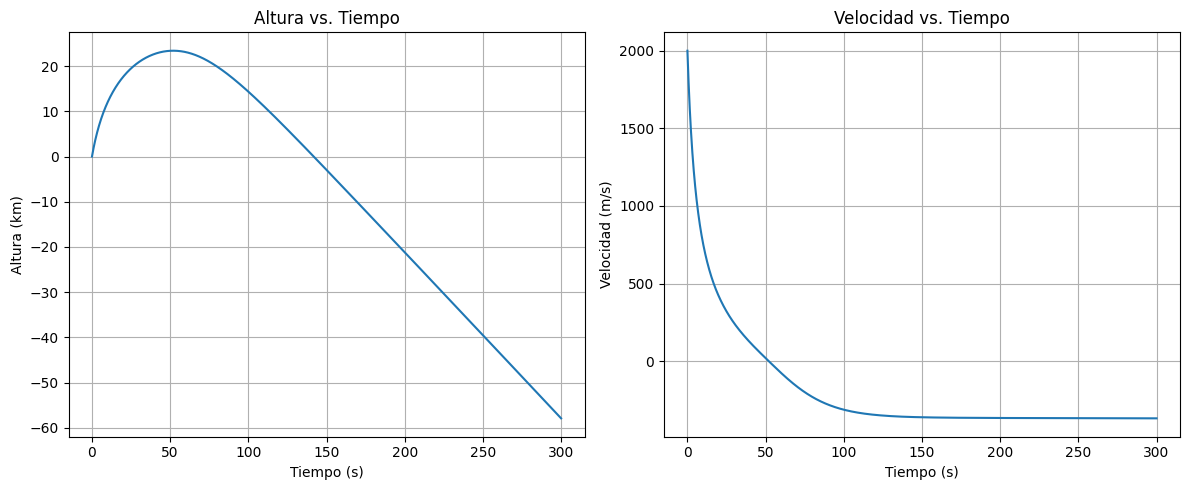

Altura máxima alcanzada: 23.41 km


In [97]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Constantes Físicas y del Cohete ---
# Constantes físicas
G = 6.67430e-11         # Constante de gravitación universal (m^3 kg^-1 s^-2)
M = 5.972e24            # Masa de la Tierra (kg)
R_earth = 6371e3        # Radio de la Tierra (m)

# Propiedades del cohete y del entorno
rho = 1.225             # Densidad del aire en superficie (kg/m^3) - ¡Es una simplificación!
Cd = 0.2                # Coeficiente de arrastre
A = 0.03                # Área frontal del cohete (m^2)
m = 50.0               # Masa del cohete (kg) - ¡Es una simplificación!
v0 = 2000.0             # Velocidad inicial (m/s)

# --- Sistema de Ecuaciones Diferenciales ---
# y[0] = altura (h), y[1] = velocidad (v)
def rocket_dynamics(t, y):
    h, v = y
    
    # Gravedad variable con la altura
    r = R_earth + h
    g = G * M / r**2
    
    # Fuerza de arrastre (fricción)
    # Se opone siempre a la velocidad. Usamos np.sign(v) para determinar la dirección.
    drag_acceleration = (0.5 * rho * Cd * A * v**2) / m
    
    # Ecuación de movimiento: dv/dt = -g - F_drag/m
    dvdt = -g - np.sign(v) * drag_acceleration
    
    # Ecuación de posición: dh/dt = v
    dhdt = v
    
    return [dhdt, dvdt]

# --- Simulación ---
# Condiciones iniciales: [altura_inicial, velocidad_inicial]
y0 = [0.0, v0]

# Intervalo de tiempo para la simulación (en segundos)
t_span = (0, 300) 
t_eval = np.linspace(t_span[0], t_span[1], 2000)

# Resolver el sistema de ecuaciones
sol = solve_ivp(
    fun=rocket_dynamics,
    t_span=t_span,
    y0=y0,
    t_eval=t_eval,
    dense_output=True
)

# Extraer resultados
t = sol.t
h = sol.y[0]
v = sol.y[1]

# --- Gráficos ---
plt.figure(figsize=(12, 5))

# Gráfico de Altura vs. Tiempo
plt.subplot(1, 2, 1)
plt.plot(t, h / 1000) # Convertir altura a km
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (km)')
plt.title('Altura vs. Tiempo')
plt.grid(True)

# Gráfico de Velocidad vs. Tiempo
plt.subplot(1, 2, 2)
plt.plot(t, v)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad vs. Tiempo')
plt.grid(True)

plt.tight_layout()
plt.show()

# Imprimir altura máxima alcanzada
h_max = np.max(h)
print(f"Altura máxima alcanzada: {h_max/1000:.2f} km")

In [85]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.005e-01 ...  4.995e+02  5.000e+02]
        y: [[ 0.000e+00  6.813e+02 ... -7.942e+04 -7.951e+04]
            [ 1.500e+03  1.239e+03 ... -1.910e+02 -1.910e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x1367e1dc0>
 t_events: None
 y_events: None
     nfev: 206
     njev: 0
      nlu: 0